Hello in the fifth ML4S notebook. This notebook will be the last notebook and it cover three topics
  

1.   transformation
2.   Non-Linear Models



Transformations: Box-Cox Transformation

Remember when we said that one of the main assumptions of linear models is to have a normal distribution? We used that to remove outliers and even cancel out dependent variables. Now we will know why this assumption is important to implement linear regression and what to do when the normality assumption is not valid.

For this notebook we will use the china_gdp dataset.

In [ ]:
df = pd.read_csv("/content/china_gdp.csv")
df.tail()

,Year,Value
50,2010,6.039659e+12
51,2011,7.492432e+12
52,2012,8.461623e+12
53,2013,9.490603e+12
54,2014,1.035483e+13


As can be seen, this dataset is simple. A timeseries that shows the annual gdp of china since 1960 to 2014. Now lets have a deeper look at this dataset.

<Axes: xlabel='Value', ylabel='Density'>

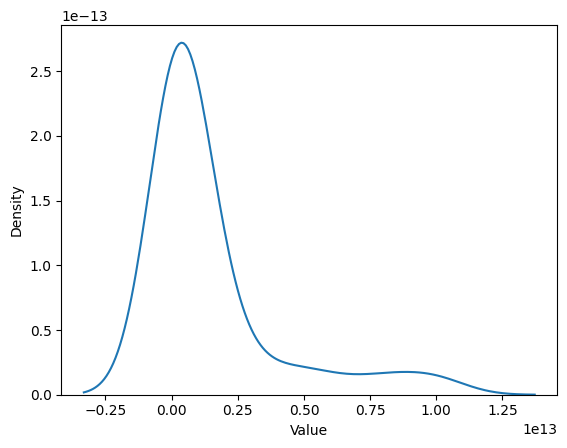

In [ ]:
sns.kdeplot(df['Value']) # kernel density estimate (KDE) plot is histogram without columns. (falsfa menee bs)

As can be seen, this is NOT a normal distribution. Lets see how does that influence the scatter plot of the target variable Value.

<Axes: ylabel='Value'>

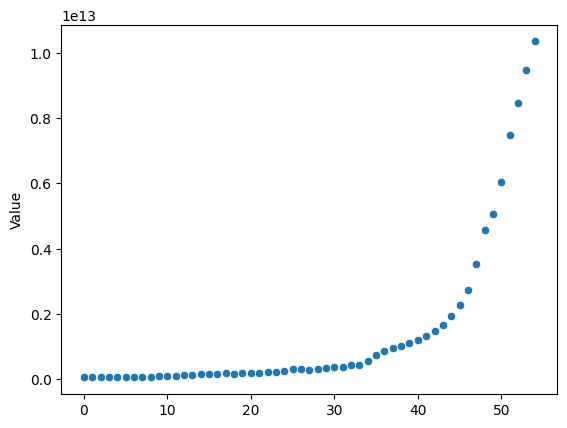

In [ ]:
sns.scatterplot(df['Value'])

So, clearly having a linear model for this is not a good idea but lets go ahead and test. After all The proof is in the pudding.



In [ ]:
# Stole your code. :D
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


X = df.drop(columns = ['Value'])
y = df['Value']

Scaler = MinMaxScaler()
X = Scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=47)

model = LinearRegression()
regressor = model.fit(X_train,y_train)
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

R-squared score: -3.0199452277745094


Well, having an R-squared in negative is clearly a bad indicator. Lets visualize it.

<Axes: xlabel='Value'>

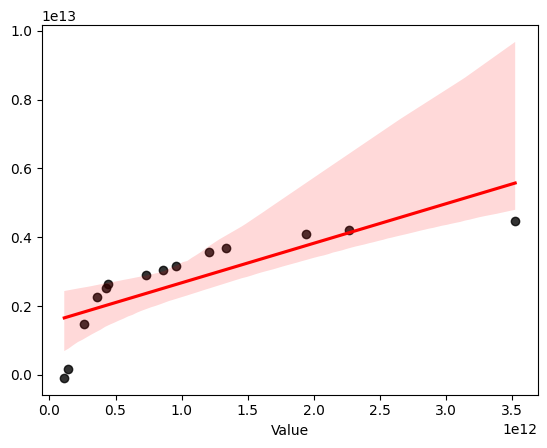

In [ ]:
#Stealing ur code again.
sns.regplot(x= y_test, y = y_pred, scatter_kws={"color": "black"}, line_kws={"color": "red"})

Well yeah. It looks bad. How can we fix this then? This is where box-cox transformation comes to play. <br>

In simple terms, boxcox transformation is a mathematical function in which your distribution is modified using a term 𝛌 such that it becomes Normal. The math behindbox-cox transformation is out of our scope. However, lets have a look at how different values of 𝛌 influences our target variable distribution.

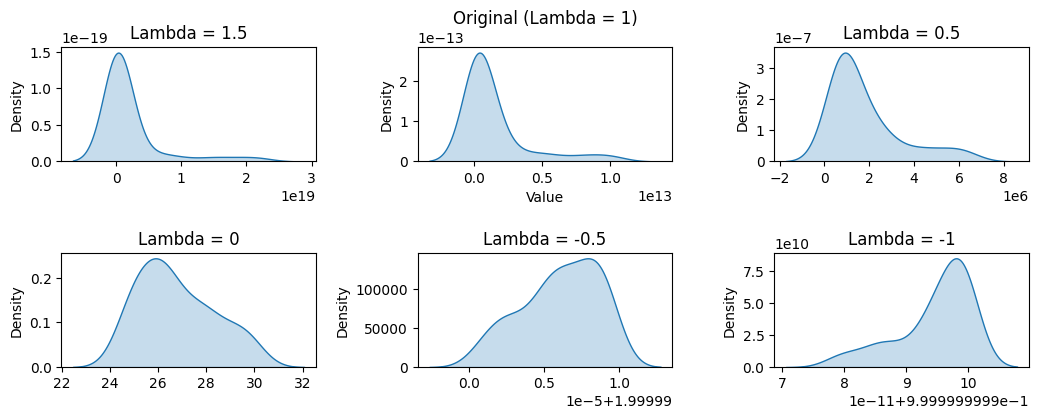

In [ ]:
from scipy.stats import boxcox #boxcox function returns new_values, optimal_lambda
values = [-1,-0.5, 0, 0.5, 1]

y = df['Value']
y0 = boxcox(y, lmbda = -1)
y1 = boxcox(y, lmbda = -0.5)
y2 = boxcox(y, lmbda = 0)
y3 = boxcox(y, lmbda = 0.5)
y4 = boxcox(y, lmbda = 1.5)

fig, axs = plt.subplots(nrows = 2, ncols=3, figsize=(9, 4))
sns.kdeplot( data=y4, ax=axs[0,0], fill=True).set_title('Lambda = 1.5')
sns.kdeplot( data=y, ax=axs[0,1], fill=True).set_title('Original (Lambda = 1)')
sns.kdeplot(data=y3, ax=axs[0,2], fill=True).set_title('Lambda = 0.5')
sns.kdeplot( data=y2, ax=axs[1,0], fill=True).set_title('Lambda = 0')
sns.kdeplot( data=y1, ax=axs[1,1], fill=True).set_title('Lambda = -0.5')
sns.kdeplot( data=y0, ax=axs[1,2], fill=True).set_title('Lambda = -1')
plt.subplots_adjust(left = 0.125,right = 1.2,bottom = 0.1,top = 0.9,
                    wspace = 0.4,hspace = 0.8)


  Decreasing λ shifts the curve towards the right. Increasing it sends it to the left. <br>

  Fortunatly, you do not have to choose your own lambda as boxcox function returns the optimal lambda for you by default. As it returns two both the new values and the optimal lambda value if you do not specify one.



In [ ]:
y = df['Value']
y_trans, lamda = boxcox(y) #returning both values
print("optimal lambda = ", lamda) #we cannot use the keyword lambda as it is a function in python

optimal lambda =  -0.18925291817225842


<Axes: ylabel='Density'>

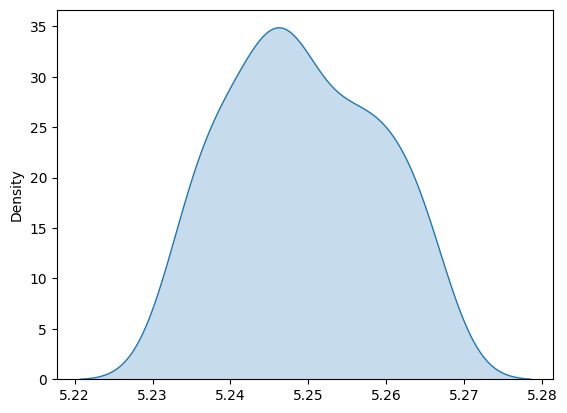

In [ ]:
sns.kdeplot(y_trans, fill = True)

Perfect! lets see the scatter plot.

In [ ]:
fig, axs = plt.subplots(nrows = 1, ncols=2, figsize=(10, 5))
sns.scatterplot( data=y, ax=axs[0]).set_title('Before Box-Cox')
sns.scatterplot(y_trans, ax=axs[1]).set_title('After Box-Cox')

In [ ]:
X = df.drop(columns = ['Value']) # Drop all columns except Value
y = y_trans

Scaler = MinMaxScaler()
X = Scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=47)

model = LinearRegression()
regressor = model.fit(X_train,y_train)
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

R-squared score: 0.9742082046564918


<Axes: >

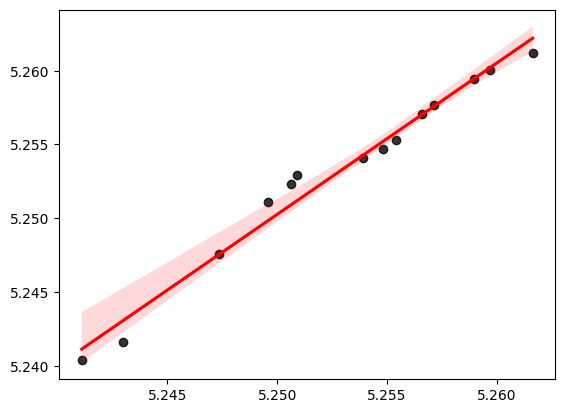

In [ ]:
sns.regplot(x= y_test, y = y_pred, scatter_kws={"color": "black"}, line_kws={"color": "red"})

Now this looks good. :D

Practice problem: <br>
Below is your work from ML4S_002 on the weather dataset. You are required to use Box-Cox Transformation to imporve the results.
1. Plot the KDE distribution of the target variable (temprature). Do you think we need to decrease or increase lambda?
2. Use Box-Cox transformation to find the optimal lambda? Was your guess in Q1 correct? (Hint: boxcox(y + A) adds a constant A to y)
3. The highset score we have reached so far on this dataset is an R-Squared of 63.5%. Did your results improve?
4. Plot the new regression plot after transofrmation.



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#df = pd.read_csv('/content/drive/MyDrive/ML4S/Datasets/weather.csv')
df = pd.read_csv('/content/weather.csv')

In [2]:
df = df.drop(columns = ['Description'])

In [3]:
# Drop outliers
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

1) Plot the KDE distribution of the target variable (temprature). Do you think we need to decrease or increase lambda?

<Axes: xlabel='Temperature_c', ylabel='Density'>

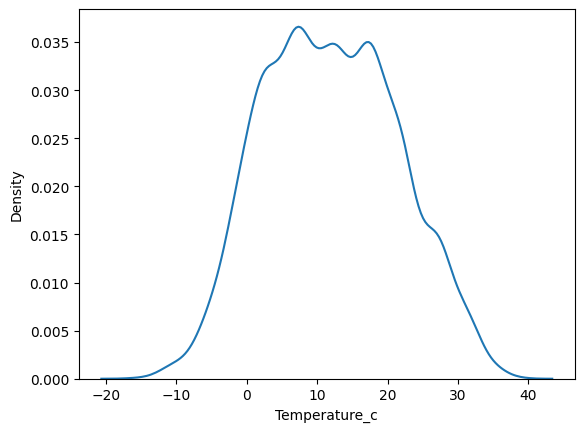

In [4]:
sns.kdeplot(df['Temperature_c'])

The KDE distribution already shows a somewhat normal. We might need a little decrease in the value of lambda.

In [25]:
from scipy.stats import boxcox #boxcox function returns new_values, optimal_lambda
y = df['Temperature_c']
min = df['Temperature_c'].min() - 0.1
y_trans, lamda = boxcox(y - min) #returning both values
print("optimal lambda = ", lamda) #we cannot use the keyword lambda as it is a function in python

optimal lambda =  0.7955290241568033


My guess for lambda was correct (ノ๑‿๑)ノ

In [32]:
from sklearn.metrics import r2_score

X = df.drop(columns = ['Temperature_c'])
y = y_trans

Scaler = MinMaxScaler()
X = Scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=47)

model = LinearRegression()
regressor = model.fit(X_train,y_train)
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

R-squared score: 0.6441167422033591


The R-sqared value had a slight improvement

<Axes: >

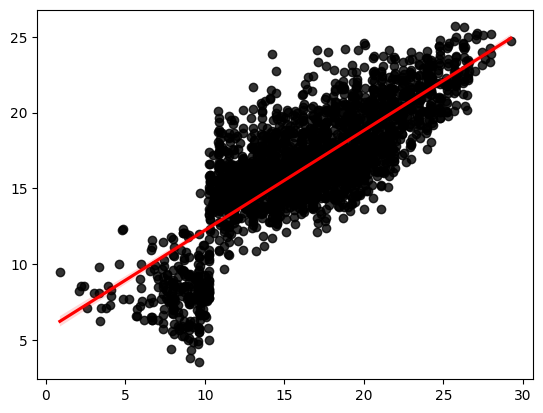

In [33]:
sns.regplot(x= y_test, y = y_pred, scatter_kws={"color": "black"}, line_kws={"color": "red"})